# O Preceptron funciona? 

Veja o vídeo que foi apresentado em sala de aula e vamos tentar reproduzir a proposta dos criadores do _perceptron_. Tentaremos t6reinar o mesmo para distinguir entre quadrados e círculos. Vamos alimentar o algoritmo de treino com 600 imagens de 20 por 20 pixels. Teremos 300 imagens de retângulos e 300 de círculos; Vamos criar mais 50 imagens de cada classe para teste.

Vamos criar as imagens.

In [1]:
import numpy as np
print(np.__version__)

1.26.4


In [2]:
listaImagens = []
# Criando 250 retângulos
for i in range(350):
    rect = np.zeros((20, 20))
    lA = np.random.randint(3, 20)
    lB = np.random.randint(3, 20)
    px = np.random.randint(0, 20-lA)
    py = np.random.randint(0, 20-lB)
    rect[px:px+lA, py:py+lB] = 1
    listaImagens.append(rect)

# Criando 250 círculos
for i in range(350):
    circle = np.zeros((20, 20))
    radius = np.random.randint(2, 10)
    cx = np.random.randint(radius, 20-radius)
    cy = np.random.randint(radius, 20-radius)
    for x in range(20):
        for y in range(20):
            if (x-cx)**2 + (y-cy)**2 <= radius**2:
                circle[x, y] = 1
    listaImagens.append(circle)

In [3]:
from matplotlib import pyplot as plt
%matplotlib widget

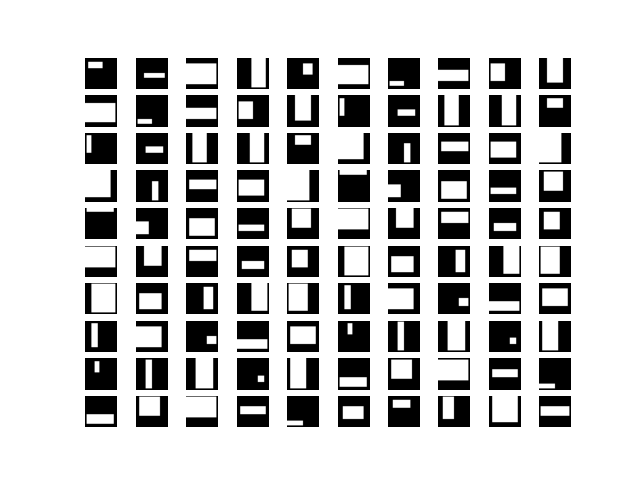

In [4]:
fig, ax = plt.subplots(10, 10)
for i in range(10):
    for j in range(10):
        ax[i, j].imshow(listaImagens[i*5+j], cmap='gray')
        ax[i, j].axis('off')

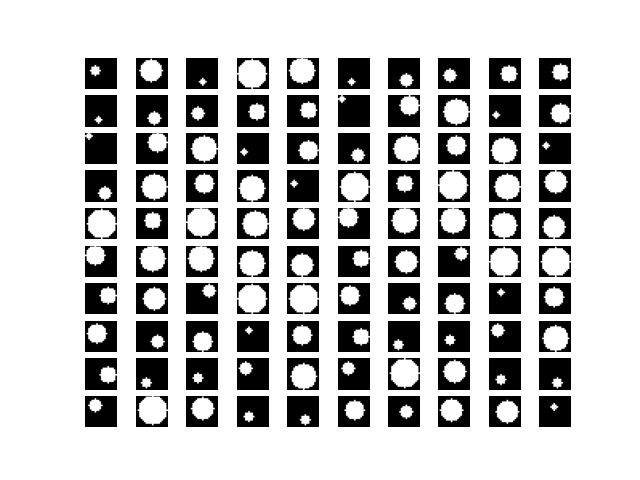

In [5]:
fig, ax = plt.subplots(10, 10)
for i in range(10):
    for j in range(10):
        ax[i, j].imshow(listaImagens[350 + i*5 + j], cmap='gray')
        ax[i, j].axis('off')

In [6]:
listaTreino = [(img, 0) for img in listaImagens[:300]] + [(img, 1) for img in listaImagens[350:650]]
listaTeste = [(img, 0) for img in listaImagens[300:350]] + [(img, 1) for img in listaImagens[650:]]

In [7]:
import random
random.shuffle(listaTreino)
print(type(listaTreino))

<class 'list'>


Epoch 0: accuracy = 0.6383333333333333
Epoch 1: accuracy = 0.6483333333333333
Epoch 2: accuracy = 0.6683333333333333
Epoch 3: accuracy = 0.7233333333333334
Epoch 4: accuracy = 0.7266666666666667
Epoch 5: accuracy = 0.7416666666666667
Epoch 6: accuracy = 0.7183333333333334
Epoch 7: accuracy = 0.745
Epoch 8: accuracy = 0.7716666666666666
Epoch 9: accuracy = 0.7716666666666666
Epoch 10: accuracy = 0.7683333333333333
Epoch 11: accuracy = 0.7816666666666666
Epoch 12: accuracy = 0.7483333333333333
Epoch 13: accuracy = 0.7633333333333333
Epoch 14: accuracy = 0.795
Epoch 15: accuracy = 0.78
Epoch 16: accuracy = 0.7733333333333333
Epoch 17: accuracy = 0.7816666666666666
Epoch 18: accuracy = 0.8166666666666667
Epoch 19: accuracy = 0.8316666666666667
Epoch 20: accuracy = 0.7916666666666666
Epoch 21: accuracy = 0.82
Epoch 22: accuracy = 0.7983333333333333
Epoch 23: accuracy = 0.84
Epoch 24: accuracy = 0.83
Epoch 25: accuracy = 0.8266666666666667
Epoch 26: accuracy = 0.825
Epoch 27: accuracy = 0.83

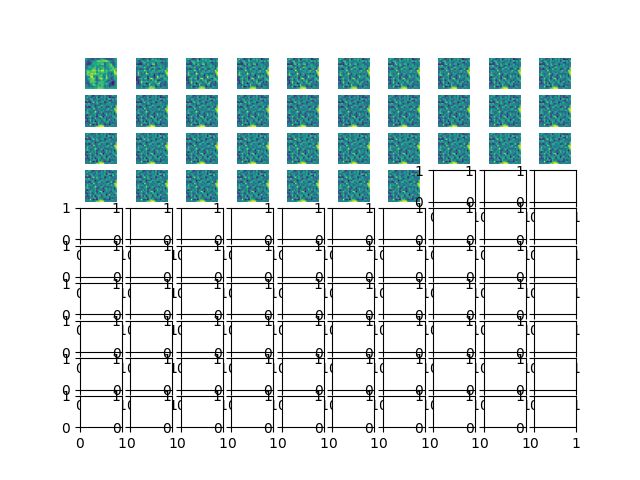

In [8]:
percep = np.zeros((20,20))
bias = 0
fig, ax = plt.subplots(10, 10)
for epoch in range(1000):
    accuracy = 0
    for img, label in listaTreino:
        y = np.sum(img*percep)
        y = 1 if y > bias else 0
        percep += (label - y)*img
        accuracy += int(label == y)
    accuracy /= len(listaTreino)
    print(f'Epoch {epoch}: accuracy = {accuracy}')
    if ((epoch  % 10) == 0):
        j = (epoch  % 100) // 10
        i = epoch // 100  
        ax[i, j].imshow(percep, cmap = plt.cm.viridis)
        ax[i, j].axis('off')
    if accuracy == 1:
        break


(-0.5, 19.5, 19.5, -0.5)

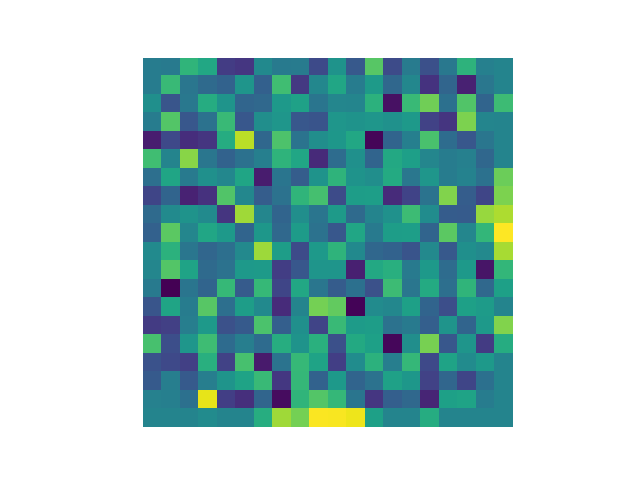

In [9]:
fig, ax = plt.subplots(1, 1)
ax.imshow(percep, cmap = plt.cm.viridis)
ax.axis('off')

In [10]:
accuracy = 0
for img, label in listaTeste:
    y = np.sum(img*percep)
    y = 1 if y > bias else 0
    print(f'Label = {label}, y = {y}') 
    accuracy += int(label == y)
accuracy /= len(listaTeste)
print(f'Accuracy = {accuracy}')

Label = 0, y = 0
Label = 0, y = 1
Label = 0, y = 1
Label = 0, y = 0
Label = 0, y = 1
Label = 0, y = 0
Label = 0, y = 0
Label = 0, y = 1
Label = 0, y = 0
Label = 0, y = 0
Label = 0, y = 0
Label = 0, y = 0
Label = 0, y = 0
Label = 0, y = 0
Label = 0, y = 0
Label = 0, y = 1
Label = 0, y = 1
Label = 0, y = 1
Label = 0, y = 0
Label = 0, y = 0
Label = 0, y = 0
Label = 0, y = 1
Label = 0, y = 0
Label = 0, y = 0
Label = 0, y = 0
Label = 0, y = 0
Label = 0, y = 0
Label = 0, y = 0
Label = 0, y = 0
Label = 0, y = 0
Label = 0, y = 1
Label = 0, y = 0
Label = 0, y = 0
Label = 0, y = 1
Label = 0, y = 0
Label = 0, y = 1
Label = 0, y = 0
Label = 0, y = 0
Label = 0, y = 0
Label = 0, y = 0
Label = 0, y = 1
Label = 0, y = 0
Label = 0, y = 0
Label = 0, y = 1
Label = 0, y = 1
Label = 0, y = 0
Label = 0, y = 0
Label = 0, y = 0
Label = 0, y = 0
Label = 0, y = 0
Label = 1, y = 1
Label = 1, y = 1
Label = 1, y = 1
Label = 1, y = 1
Label = 1, y = 1
Label = 1, y = 1
Label = 1, y = 0
Label = 1, y = 1
Label = 1, y =

Vamos ver na prática como funciona o perceptron.

(-0.5, 19.5, 19.5, -0.5)

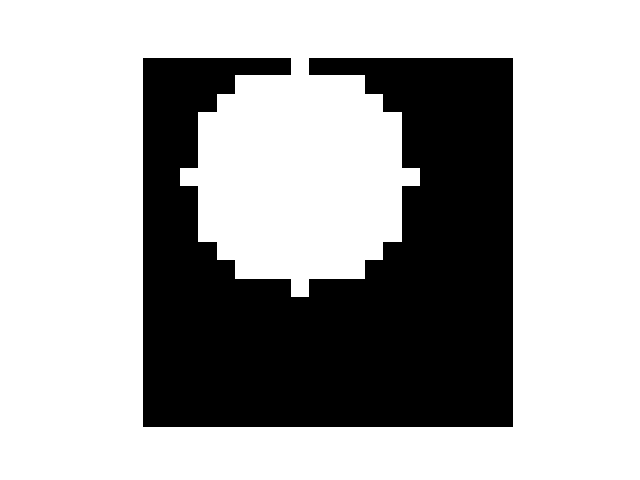

In [18]:
img = listaImagens[random.randint(0, 699)]
fig, ax = plt.subplots(1, 1)
ax.imshow(img, cmap='gray')
ax.axis('off')

In [19]:
isCircle = np.sum(img*percep)
isCircle = True if isCircle > bias else False
print(f'Output = {isCircle}')

Output = True
